<a href="https://colab.research.google.com/github/AmruthaA27/LoanPredictionStatus_FinalProject/blob/main/FinalProject_LoanStatusPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [ ]:
#reading train and test data sets
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')
print(df_train.shape)
df_test.shape

(614, 13)


(367, 12)

In [ ]:
data = pd.concat([df_train,df_test])
data.drop("Loan_ID",axis=1,inplace=True)

#identify missing value
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
#filling missing value
from sklearn.ensemble import RandomForestRegressor
for i in [data]:
  i["Gender"] = i["Gender"].fillna(data.Gender.dropna().mode()[0])
  i["Married"] = i["Married"].fillna(data.Married.dropna().mode()[0])
  i["Dependents"] = i["Dependents"].fillna(data.Dependents.dropna().mode()[0])
  i["Self_Employed"] = i["Self_Employed"].fillna(data.Self_Employed.dropna().mode()[0])
  i["Self_Employed"] = i["Self_Employed"].fillna(data.Self_Employed.dropna().mode()[0])
  i["Credit_History"] = i["Credit_History"].fillna(data.Credit_History.dropna().mode()[0])

  from sklearn.ensemble import RandomForestRegressor
  data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]
  imp = IterativeImputer(RandomForestRegressor(),max_iter=10, random_state=0)
  data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#appending columns after filling missing data

data.drop(['LoanAmount'],axis=1)
data.drop(['Loan_Amount_Term'],axis=1)
data['LoanAmount'] = data1['LoanAmount']
data['Loan_Amount_Term'] = data1['Loan_Amount_Term']

data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
#data encoding
for i in [data]:
  i["Gender"] = i["Gender"].map({"Male":0,"Female":1})
  i["Married"] = i["Married"].map({'No':0,'Yes':1})
  i["Self_Employed"] = i["Self_Employed"].map({'No':0,'Yes':1})
  i["Credit_History"] = i["Credit_History"].astype(int)
  i["Education"] = i["Education"].map({'Not Graduate':0,'Graduate':1})

for i in [data]:
  i["Property_Area"] = i["Property_Area"].map({'Urban':0,'Rural':1,'Semiurban':2})
  i["Dependents"] = i["Dependents"].map({'0':0,'1':1,'2':2,'3+':3})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

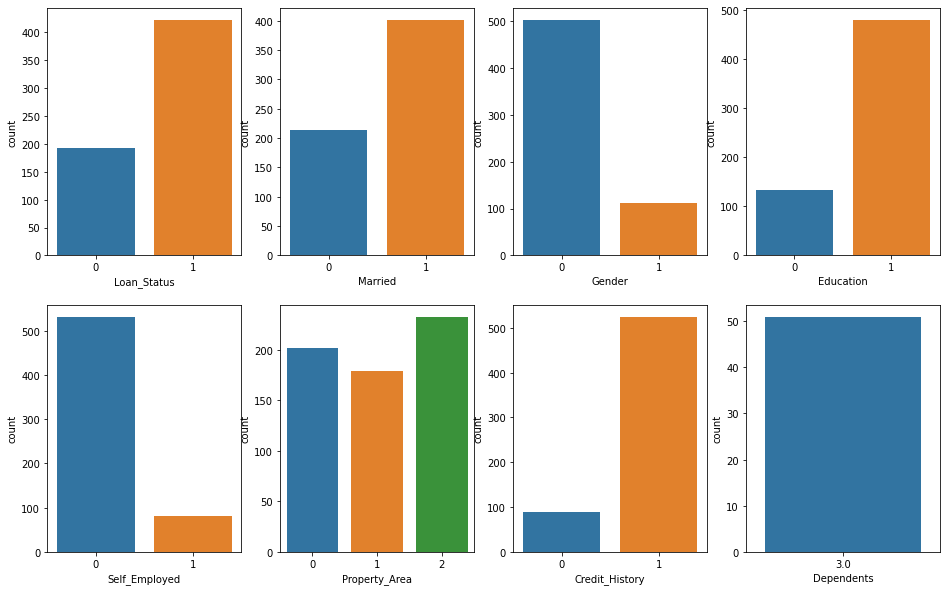

In [ ]:
#initial data analysis
new_train = data.iloc[:614]
new_test = data.iloc[614:]

new_train['Loan_Status']= new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=new_train,ax=ax[0][0])
sns.countplot('Married',data=new_train,ax=ax[0][1])
sns.countplot('Gender',data=new_train,ax=ax[0][2])
sns.countplot('Education',data=new_train,ax=ax[0][3])
sns.countplot('Self_Employed',data=new_train,ax=ax[1][0])
sns.countplot('Property_Area',data=new_train,ax=ax[1][1])
sns.countplot('Credit_History',data=new_train,ax=ax[1][2])
sns.countplot('Dependents',data=new_train,ax=ax[1][3])

<function matplotlib.pyplot.show(*args, **kw)>

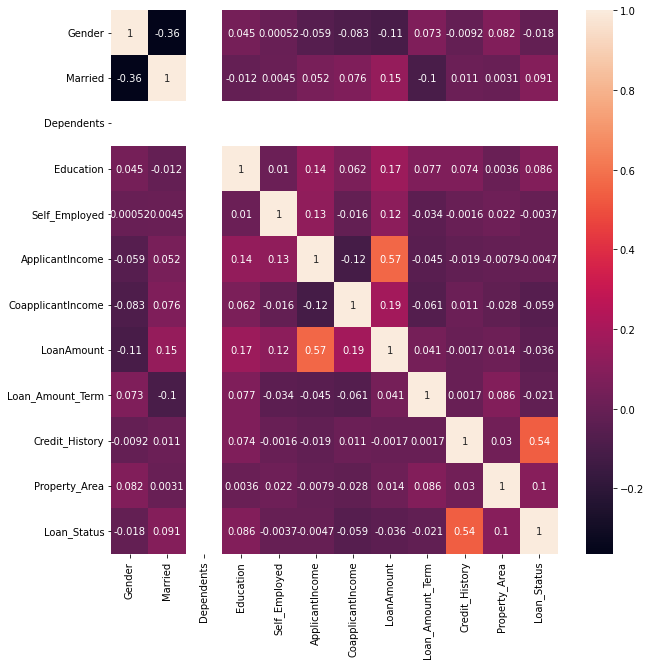

In [ ]:
plt.figure(figsize = (10,10))
correlation_matrix = new_train.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

In [ ]:
for i in [data]:
  i['TotalIncome'] = i['ApplicantIncome']+i['CoapplicantIncome']

r = 0.0066
data['EMI']=data.apply(lambda x:(x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)

#loan amt per totalIncome
data['LoanAmt_per_totInc']= data['LoanAmount']/data['TotalIncome']

#loan amt term per totalIncome
data['Loan_Amt_term_per_totInc']=data['Loan_Amount_Term']/data['TotalIncome']

#emi per loan amt term
data['EMI_per_Loan_Amt_term']=data['EMI']/data['Loan_Amount_Term']

#emi per loan amt
data['EMI_per_Loan_Amt']=data['EMI']/data['LoanAmount']


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

Loan_Amt_term_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Loan_Amt_term_bins'] = Loan_Amt_term_discretizer.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


In [ ]:
#new_train.shape
data.shape
data = data.drop(['Dependents'],axis = 1)



In [ ]:
new_train = data.iloc[:614]
new_test = data.iloc[614:]
new_train.shape

(614, 17)

In [ ]:
x = new_train.drop(['Loan_Status'],axis = 1)
y = new_train['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [ ]:
x_train.isnull().sum()

Gender                      0
Married                     0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
TotalIncome                 0
LoanAmt_per_totInc          0
Loan_Amt_term_per_totInc    0
EMI_per_Loan_Amt_term       0
EMI_per_Loan_Amt            0
Loan_Amt_term_bins          0
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
LogReg_Clf = LogisticRegression()
from sklearn.model_selection import cross_val_score

cross_val_score(LogReg_Clf,x_train,y_train,scoring=make_scorer(accuracy_score),cv=3)

pred = LogReg_Clf.fit(x_train,y_train).predict(x_test)
accuracy_score(pred,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8594594594594595